In [20]:
# import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV    


In [21]:
# import dataset
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


EDA

In [22]:
# drop name and passengerId
df = df.drop(['PassengerId', 'Name'], axis=1)

In [23]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


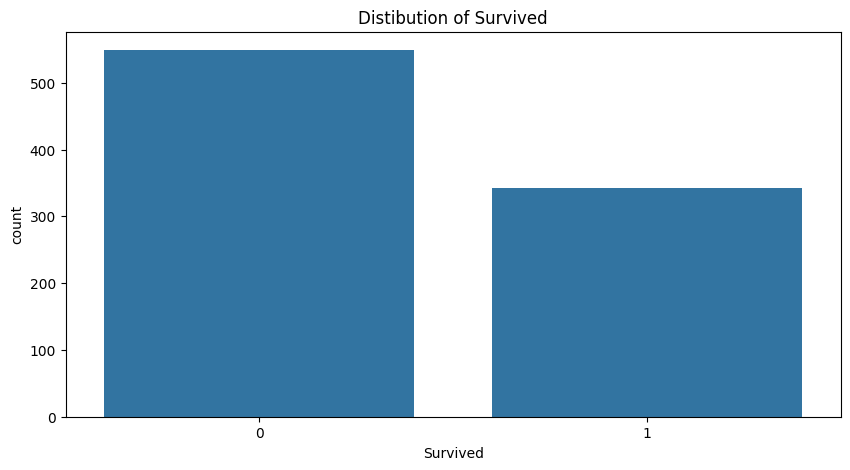

In [25]:
# let see the distribution of target (survived)
plt.figure(figsize=(10,5))
sns.countplot(x=df['Survived'])
plt.title('Distibution of Survived')
plt.show()


In [26]:
# lets see null value
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [27]:
# we will fill 'age' with the the median of 'age'
df['Age'] = df['Age'].fillna(df['Age'].median())

In [28]:
# we will fill 'Embarked' with mode of 'Embarked
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [31]:
# 'Cabis' has too many missing value, so we will drop it
df = df.drop('Cabin', axis=1)

In [33]:
# lets encode 'sex' and 'embarked'
enc_col = ['Sex', 'Embarked']

In [34]:
# encode with label encoder
le = LabelEncoder()

for col in enc_col:
    df[col] = le.fit_transform(df[col])

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,A/5 21171,7.2500,2
1,1,1,0,38.0,1,0,PC 17599,71.2833,0
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,1,1,0,35.0,1,0,113803,53.1000,2
4,0,3,1,35.0,0,0,373450,8.0500,2


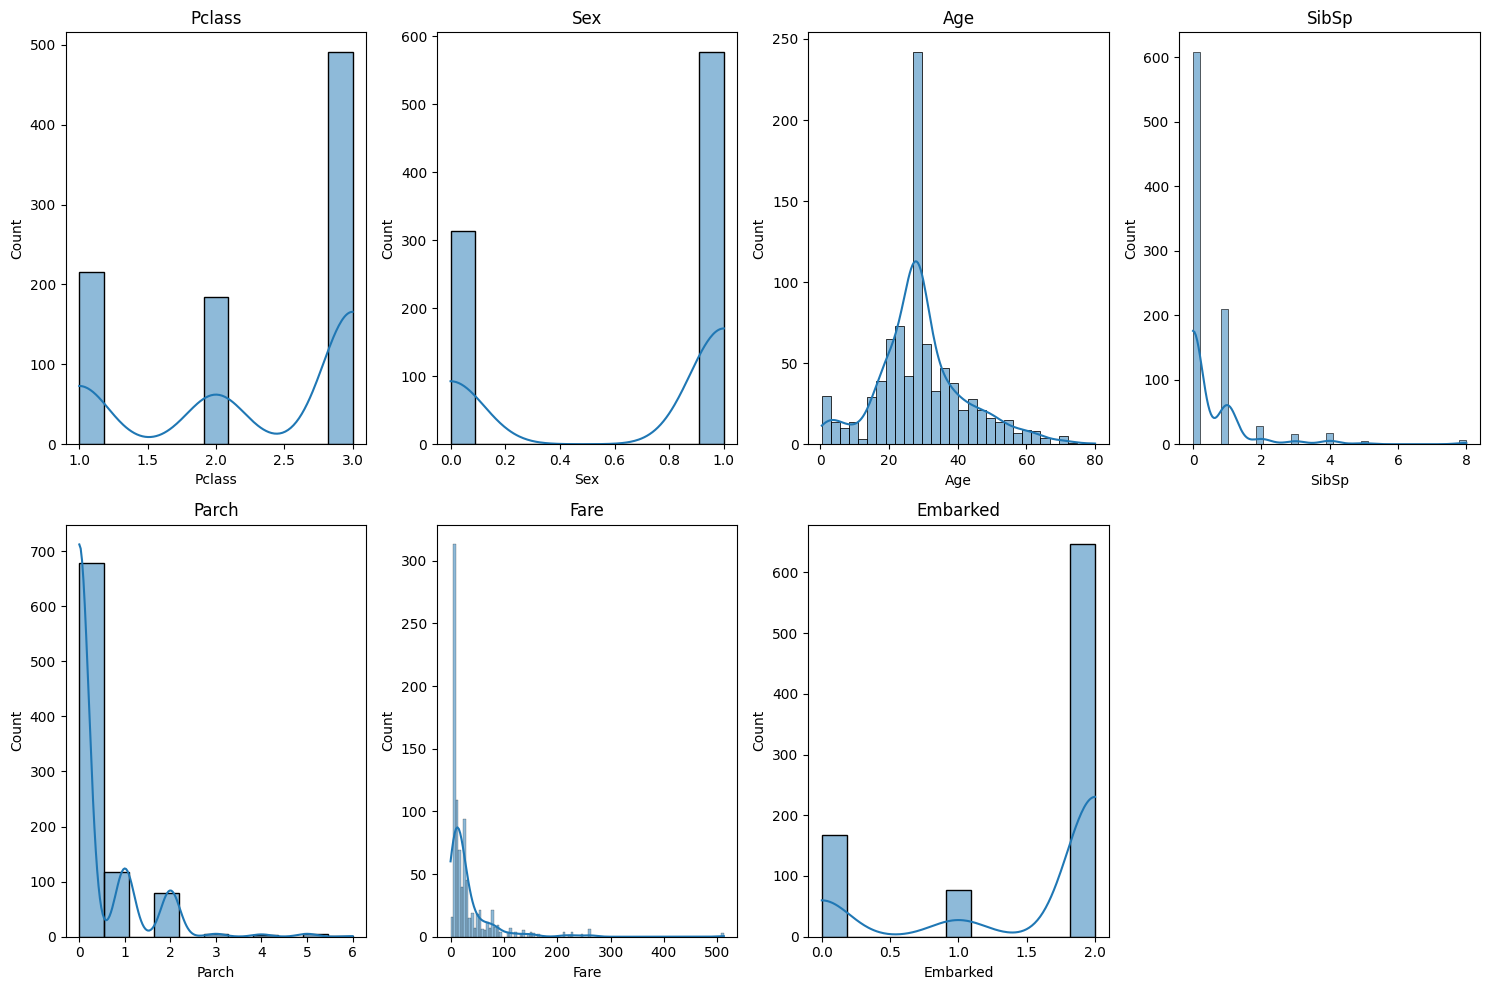

In [35]:
# let see the distribusion of 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', and 'Fare'ArithmeticError

num_col = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_col):
    plt.subplot(2, 4, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

In [40]:
# lets see correlation 'Ticket' with 'Survived'

# encode 'Ticket' with label encoder
df['Ticket'] = le.fit_transform(df['Ticket'])

# correlation between 'Ticket' and 'Survived'
survivedd_ticket_corr = df['Survived'].corr(df['Ticket'])

print(f'Correlation between Ticket and Survived: {survivedd_ticket_corr}')

Correlation between Ticket and Survived: -0.16454913400236715


In [41]:
# because the correlation is low, we will drop 'Ticket'
df = df.drop('Ticket', axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


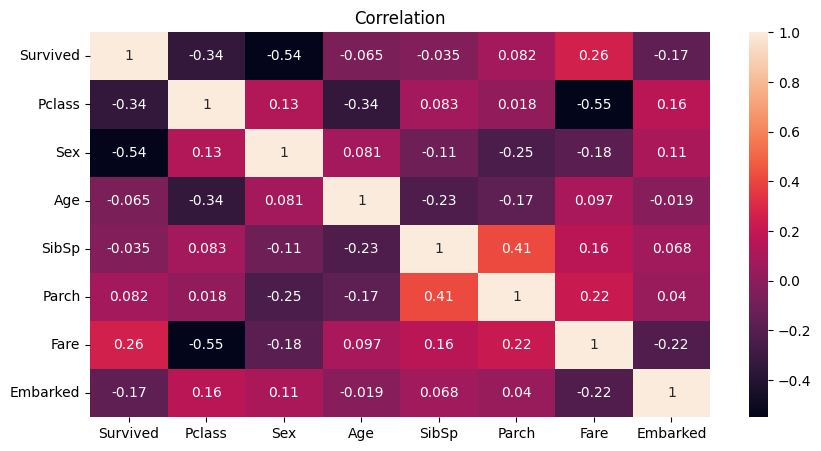

In [42]:
# let see correlation of df
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation')
plt.show()

Modelling

In [43]:
# split data
X = df.drop('Survived', axis=1)
y = df['Survived']

In [44]:
# spliut data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# model
rf = RandomForestClassifier()

In [46]:
# fit model
rf.fit(X_train, y_train)

RandomForestClassifier()

In [47]:
# predit on test data
y_pred = rf.predict(X_test)

In [48]:
# evaluate model with accuracy
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc}')

Accuracy: 0.8156424581005587


In [ ]:
# lets do hyperparameter tuning
paramm_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(rf, paramm_grid, cv=5, n_jobs=-1)

grid.fit(X_train, y_train)

print(f'Best parameter: {grid.best_params_}')

# predict with best parameter
best_rf = grid.best_estimator_

y_pred = best_rf.predict(X_test)